#  Exercise - Spatial Data Infrastructures (SDI)

<img align="right" width=100 height=190 src="../images/TUM_Logo_blau_rgb_p.png"/>

<blockquote>
Munich Technical University / Chair of Geoinformatics <br> 
Murat Kendir*, Jicang Zhu, Prof. Thomas Kolbe <br> 
murat.kendir@tum.de
</blockquote>

<div align="right" style="font-size:0.5em;">v. WiSe 2025-2026</div>

## Table of Contents

- [0. Aim of the Exercise](#0-aim-of-the-exercise)
    - [0.1. General Preparation](#01-general-preparation)
    - [0.2. Python Tips](#02-python-tips)
- [1. Finding the datasets](#1-finding-the-datasets)
- [2. Creating a "Service Selection Tool"](#2-creating-a-service-selection-tool)
    - [2.1. Adding some interaction to the tool](#21-adding-some-interaction-to-the-tool)
    - [2.2. Use the created program in another python program](#22-use-the-created-program-in-another-python-program)
- [3. Datasets](#3-datasets)
    - [3.1. Building Footprints (Grundstück)](#31-building-footprints-grundstück)
    - [3.2. Land Parcels (Flurstücke)](#32-land-parcels-flurstücke)
    - [3.3. Digital Elevation Model (DEM / Höhenmodell)](#33-digital-elevation-model-dem-hohenmodell)
    - [3.4. Flood Risk Zones](#34-flood-risk-zones)
- [4. Adding Services to GIS Software](#4-adding-services-to-gis-software)
    - [4.1. Adding Services to QGIS](#41-adding-services-to-qgis)
        - [4.1.1. Add XYZ Basemap](#411-add-xyz-basemap)
        - [4.1.2. Add WMS Service](#412-add-wms-service)
        - [4.1.3. Add WFS Service](#413-add-wfs-service)
    - [4.2. Adding Services to ArcGIS Pro](#42-adding-services-to-arcgis-pro)
    - [4.3. Adding a WMS Service in FME](#43-adding-a-wms-service-in-fme)
        - [4.3.1. Adding a WMS Service to FME as Background Map](#431-adding-a-wms-service-to-fme-as-background-map)
        - [4.3.2. Adding a WMS Service to FME as Reader](#432-adding-a-wms-service-to-fme-as-reader)
        - [4.3.3. Using GetFeatureInfo request in FME (Optional Step)](#433-using-getfeatureinfo-request-in-fme-optional-step)
- [5. Accessing WMS services with OWSLib Python Library](#5-accessing-wms-services-with-owslib-python-library)
    - [5.1. Examine a WMS service with OWSLib](#51-examine-a-wms-service-with-owslib)
- [6. Using ipyleaflet to show the web services](#6-using-ipyleaflet-to-show-the-web-services)
    - [6.1. Add a WMS layer into the leaflet map](#61-add-a-wms-layer-into-the-leaflet-map)
    - [6.2. Add a GeoJSON data into the leaflet map using a OGC API - Features connection](#62-add-a-geojson-data-into-the-leaflet-map-using-a-ogc-api-features-connection)


## 0. Aim of the Exercise

In the previous exercise we explored the interactions in several Web-GIS applications and we treid to model the ongoing interactions using UML Class Diagrams.

In this tutorial, you will learn how to search for a geospatial dataset using different levels (regional, city scale, etc.) of “Spatial Data Infrastructures” (SDIs). 

- You will explore multiple SDI websites that provide some geospatial datasets in different formats or as different types of web services.
- You will then learn how to combine and represent these datasets in popular GIS platforms such as QGIS and ArcGIS Pro.
- Finally, you will create a small python application that connects and utilizes the selected geospatial data for a specific purpose.

You can refer to the following resources when needed:

### 0.1. General Preparation

- [Introduction to Python Exercise](intro_python)


### 0.2. Python Tips

- A python program can be executed simply by calling it with the python **interpreter** by simply typing ```python my_first_python_program.py```. 
- Python uses **indentation** to highlight the blocks of code.
- Python applications can be run in **virtual environments** with all necessary libraries pre-installed.
- Python have many **libraries** to support main applications with predefined classes, functions and data types (e.g. os, json, requests etc) and they can be implemented with **import** command.
- **```if / elif / else```** is a conditonal statement.
- **```for x in array```** creates a sequence to iterate in an array-like (iterative) object.
- There are useful built-in functions (which you can list all with ```dir(__builtins__)```) to investigate an object in python such as **type, dir, help, print, vars**.
- A function can be set with the **def** (stands for DEFinition) command and mandatory and optional parameters can be specified in parentheses. For example: ```def save_somebody(name, surname, species="Homo Sapiens"):```
- A file can be manipulated by specifiying file path and file permission. For example: ```with open("current_folder/relative_file_path.txt", "w") as myfile:```
- A python **dictionary** is a bit different from a **JSON** object and they can be converted to eachother with json.load(s) and json.dump(s) functions of json library.
- A questionnaire can be set with **```input("Enter a custom name")```** function.

## 1. Finding the datasets

Global Sea Level is rising at an increasing rate every year, causing floods to occur more frequently all over the world. This forces local (or regional) governments to take measures against future floods. <b>Suppose you are responsible for preparing a disaster management application in Hamburg.</b> This application will calculate the flood risk for a specific building and generate a report with information on the extent of the risk and the relevant land parcel number. For this purpose, you need to find the most suitable geographic data services using the <a href="https://inspire-geoportal.ec.europa.eu">INSPIRE Geoportal</a>, <a href="https://geoportal.de">geoportal.de</a> and <a href="https://transparenz.hamburg.de">Hamburg TransparenzPortal</a>. Imagine that these datasets should contain the following data layers: 
<ul>
    <li>Buildings footprints (DE: Gebeaude Grundstücke) | (will be searched for in the Section 3a)</li>
    <li>Land Parcels (DE: Flurstück)</li>
    <li>Digital Elevation Model / DEM (DE: Höhenmodell / DHM)</li>
    <li>Flood Risk Zones (DE: Hochwasserrisikos)</li>
</ul>
<div align=center>
    
<figure style="width:282px;padding:10px;background-color:#dad7cb;">
    <img src="../images/sdis/hamburg_1962.jpg" width=282 height=200/>
    <figcaption>During the catastrophic flood of 1962, boats were used to rescue Hamburg residents from flooded buildings.
            <a href="https://www.bloomberg.com/news/features/2023-11-20/the-design-history-of-london-s-mansion-block-apartment-buildings"> Source</a>
    </figcaption>
</figure>
</div>

## 2. Creating a "Service Selection Tool"
Before you start examining the given Spatial Data Infrastructures (SDIs), you will set up a function in python that makes it easy to store the names, links and additional information of the services.

In [4]:
# In Python, there is no need to specify the variable data type.
# However, you can still use type conversion methods or shortcuts to specify the data type.
# For Exp. '{}' is a shortcut to create a python dictionary.

#Create an empty dictionary.
my_services = {} 

# !Remember the role of indentation in python.
def add_to_store(service_id, name, url, wms_url):
# Here, you set a complex data in python dictionary data type.
    my_services[service_id] = { "name" : name
        , "url" : url
        , "WMS_URL" : wms_url}
    print(my_services)

#Extras for checking the dictionary data type and result of the function:
# type(my_services)
# help(my_services)
# add_to_store("service_1", "my_fav", "https://sdi.com", "https://wms.sdi.com/my_city?")
# print(my_services.get("service_1"))
# my_services.clear()
# print(my_services.get("service_1"))


<blockquote> TIP : You may have noticed that the square brackets <b>[ ]</b> we use to set a new item in the dictionary are
also a shortcut. You can also find this information in related hidden functions like <b>__getitem__()</b> or
<b>__setitem__()</b>. Type <i><b>dir(my_services)</i></b> or <i><b>dir(dict())</i></b> to reveal them.</blockquote>

### 2.1. Adding some interaction to the tool

Now, suppose that you want to use the function in an interactive way to let other users also add the found services into the dictionary.
To do that, we can implement another function which runs an input command for every instance in the dictionary:

In [5]:
# You can now define another function to interactively ask and store the knowledge data in your dictionary.

keys = ["name", "Url of SDI", "URL of WMS Service"]

# If the code runs for the first time, then the dictionary needs to be initialized.
if 'my_services' in locals(): # Checks if a variable is available in the local scope.
    pass
else:
    my_services = {}

# Following line adds only the keys defined above. 
# These kind of inline functions called as comprehensions in Python.
my_services["0"] = {key: None for key in keys}
# print(my_services) 

def add_to_store(service_id, name, sdi_url, wms_url):
    # Here, you set a complex data in python dictionary data type.
    my_services[service_id] = { keys[0] : name, keys[1] : sdi_url , keys[2] : wms_url}
    print(my_services)

def found_service():
    service_id = input("Give an ID (number or unique value)...")
    service_data = [] # Created a list to save the values temporarily
    for i in range(3): # Meet another object here: range
        questionnaire = "Please specify the " + keys[i]
        service_data.append(input(questionnaire))
        i+=1
    #Note that a list index is very similar to range, but always starts from 0.
    add_to_store(service_id, service_data[0], service_data[1], service_data[2])

found_service()
# my_services.clear()

Give an ID (number or unique value)... 1
Please specify the name Hamburg Buildings
Please specify the Url of SDI tranzparenz.hamburg.de
Please specify the URL of WMS Service https://geodienste.hamburg.de/wms/building?


{'0': {'name': None, 'Url of SDI': None, 'URL of WMS Service': None}, '1': {'name': 'Hamburg Buildings', 'Url of SDI': 'tranzparenz.hamburg.de', 'URL of WMS Service': 'https://geodienste.hamburg.de/wms/building?'}}


- [ ] **Save the code** above as "service_selection.py" into "raw_codes/exr3" directory.

## 2.2. Use the created program in another python program

- [ ] Check if the file exists in the "/raw_codes/exr3" folder.
- [ ] Start a new code and import the functions and variables defined in the previously created python file.

In [6]:
# When you save a python file contains classes, functions and variables into another folder
# , this folder with its contents can be called as a "python module".

# Note that importing a module is enough to access to the functions and variables.
# The contents of the modules are only accessible with dot (.) operator.

# Method 1
from raw_codes.exr3 import service_selection as srv
#print(srv.keys)

# Method 2
# from raw_codes.exr3.service_selection import keys, my_services, add_to_store, found_service
# print(keys)

# Now you can call your program to save the data about the found geospatial services:
# srv.found_service() 
# srv.my_services.clear()

<blockquote> TIP : You may notice that importing a library into existing python code is very similar to importing an additional python program. This is so because the import command looks for multiple sources in a order. First it tries to find a python file, then it looks for the corresponding python file in the directories defined as the PYTHONPATH environment variable. To see the defined paths in your system import the library <b>sys</b> and print out <b>sys.path</b> object.</blockquote>

## 3. Datasets

### 3.1. Building Footprints (Grundstück)



Visit the web site [Hamburg TransparenzPortal](https://transparenz.hamburg.de) and search for the **building footprints** available for Hamburg city. Try to search with following possible words / tags:
- Administrative Unit (Verwaltungseinheiten) 
- House Coordinates (Hauskoordinaten) 
- ALKIS 
- Land Parcel (Flurstück) 
- Building (Gebaeude)


Explore possible answers to the following questions:
- [ ] Which one is the correct data for your purpose?
- [ ] What kind of data it is? Is it a web service or static file?
- [ ] How current is the data you find?
- [ ] Where is the metadata of the service or file?

Finally: 
- [ ] If you think you have found a web service that suits your purpose, run the “**found_service()**” function in the code (created in section 2b) and save the relevant information.
<div align="center">
<img src="../images/sdis/grundstuecke_service.png" width=250 height=250 align=center style="padding:10px;background-color:#dad7cb;"/>
</div>

### 3.2. Land Parcels (Flurstücke)

Visit the web site [geoportal.de](https://geoportal.de) and search for the **land parcels** available for Hamburg city. 
> TIP: If you can not find the land parcels for the Hamburg city try adding "HH" to your keywords. "HH" is the city code for Hamburg used on license plates and it is possible to find relevant datasets using these codes. More information can be found on this [site](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_Germany).

Find the metadata of the dataset and explore possible answers to the following questions:
- [ ] What is the base coordinate system for land parcels according to the metadata?
- [ ] Who or which organization is responsible for the dataset?

Find the XML responses of WMS or WFS services to the "GetCapabilities" operation and explore possible answers to the following questions:
- [ ] Is the service response from the same domain? (Check the URL)
- [ ] Are multiple coordinate systems supported for publishing?
- [ ] How many layers does a selected web service consists of?
- [ ] Can the layers be used for querying?
- [ ] What other possible operations can be requested besides "GetCapabilities"?

Finally: 
- [ ] If you think you have found a web service that suits your purpose, run the “**found_service()**” function.

<div align="center">
<img src="../images/sdis/flurstuecke_service.png" width=250 height=250 align="center" style="padding:10px;background-color:#dad7cb;"/>
</div>

### 3.3. Digital Elevation Model (DEM / Höhenmodell)

Visit the web site [INSPIRE Geoportal](https://inspire-geoportal.ec.europa.eu) and search for the **Digital Elevation Model** available for the Hamburg city.
- Click to "Browse INSPIRE Thematic Datasets".
- Click to "INSPIRE Data Themes"
- Find the relevant theme on this page and select the country on the following web page.

Explore possible answers to the following questions:
- [ ] Where is the service URL? (Please find the “Copy” icon under the “Preview Dataset” button.)
- [ ] What kind of services are available in the theme? 
- [ ] Can TANDEM-X datasets be useful for our project? If not, why?
- [ ] Is the selected dataset also available on **geoportal.de** ?
- [ ] Is the selected dataset also available on **Hamburg Transparenzportal**?
- [ ] Are all domain names in the service URLs the same?

Finally: 
- [ ] If you think you have found a web service that suits your purpose, run the “**found_service()**” function.

<div align="center">
<img src="../images/sdis/hohemodell_service.png" width=250 height=250 align="center" style="padding:10px;background-color:#dad7cb;"/>
</div>

### 3.4. Flood Risk Zones

Visit the web site [INSPIRE Geoportal](https://inspire-geoportal.ec.europa.eu) again and search for the **flood risk zones** available for the Hamburg city.

- Click to "Browse Priority Data Sets".
- Click to "Environmental Domains".
- Click to "Water".
- Select the country and search with following possible words / tags:
  - Wasserrahmenrichtlinie (Water Framework Directive)
  - Gewässer (Water Bodies)
  - Hochwasserrisikos (Flood Risks)
  - Fließgewässern (Watercourses)

<blockquote>TIP: Please find the “Copy” icon under the “Preview Dataset” button to find the service URLs.</blockquote>

Finally: 
- [ ] If you think you have found a web service that suits your purpose, run the “**found_service()**” function.

<div align="center">
<img src="../images/sdis/flood_risk_service.png" width=250 height=250 align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

## 4. Adding Services to GIS Software

In this chapter, you will learn how to add web services or datasets to a GIS software. You probably don't know what "web service" actually means or how to use it correctly, but you don't need to have a deep understanding of web services right now. You may need to recognize the type of web service, but nothing more.



### 4.1. Adding Services to QGIS

#### 4.1.1. Add XYZ Basemap

- Start by adding a basemap with global coverage and simple styling. "Carto Positron" would be a good option for this purpose. (If you want to try other XYZ basemap services, visit [Klas Karlsson's github repository](https://github.com/klakar/QGIS_resources/blob/master/collections/Geosupportsystem/python/qgis_basemaps.py) or search online.
  - [ ] Find XYZ Tiles in browser panel on the left side and right click to add a new connection.
  - [ ] Copy and paste [https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png](https://cartodb-basemaps-a.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png) link to the URL textbox and give any name as you want. Click Ok button.
  - [ ] Find the city center of Hamburg on the map and zoom in until the canvas covers only some buildings. Alternatively, at the bottom of the QGIS window you can set the scale to 1:2000 or larger.

> TIP: Sometimes you need to zoom in on your area of interest to avoid long loading times or just to make sure that the layer is visible in the area.

<div align="center">
<img src="../images/sdis/qgis_adding_xyz.png" width=250 height=auto align="center"  style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

- Check the coordinate system of the active map canvas (map widget in the software). If it is defined as OGC:CRS84, change it to EPSG:4326 Coordinate Reference System (CRS). You will notice some distortion on the map canvas, this is normal because EPSG:4326 (aka WGS84) is a geographic coordinate system, not a projected coordinate system. You may need to use this coordinate system from time to time because it is one of the most widely supported CRS by web services.
- Check the type of web services you noted in section 1) and add them considering the type of web services.

> TIP: There are multiple ways to check the type of web services. One could be to check the categories or filters available on the SDI website. The other method could be to check the metadata to find the type. Finally, if you segment the request URL, you might see a query parameter like "service=WMS" or "service=WFS".

<div align="center">
<img src="../images/sdis/qgis_crs.png" width=250 height=auto align="center" style="padding:10px;background-color:#dad7cb;"/>
</div>

#### 4.1.2. Add WMS Service
  - [ ] Go to **Layer > Add Layer > Add WMS/WMTS Layer** in the menu bar.
  - [ ] To create a new connection, click the New button and copy & paste the URL you noted in part 1). Click OK and then click the Connect button.
  - [ ] Click to any available layer in the service, check the coordinate system and click to Add Button.

<div align="center">
<img src="../images/sdis/qgis_wms.png" width=250 height=auto align="center" style="padding:10px;background-color:#dad7cb;"/>
</div>


#### 4.1.3. Add WFS Service
  > **IMPORTANT NOTE** Some servers provide Complex Data Features with WFS services, which makes it difficult to add these services to GIS software. So, if you notice such a WFS with complex data, avoid adding this service.

  - [ ] Go to **Layer > Add Layer > Add WFS / OGC API - Features Layer** in the menu bar. To create a new connection, click the New button and copy and paste the URL you noted in part 1). Specify the "Max. number of features" as 200 or less. Click OK and then click the Connect button.
  - [ ] Click to any available layer in the service, check the coordinate system and click to Add Button.
  - [ ] Select only a few features from the screen or press Ctrl + F6 buttons. Take a glance on existing attributes and values for the features.

  > Tip: Sometimes features can be presented as overlapping polygons in the same data service.
If you are in doubt about overlapping polygons, simply change the symbology of the layer in the properties window to transparent fill to reveal the overlapping polygons.

### 4.2. Adding Services to ArcGIS Pro

- ArcGIS Pro collects all the data services in the “Servers” section.
- [ ] Navigate to Connections > Server > New WMS Server from the Insert tab.      
- [ ] Copy & Paste WMS address into “Server URL” text box. Specify user authentication if it is needed.

<div align="center">
<img src="../images/sdis/arcgis_pro_add_connection.png" width=300 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

- [ ] If the server has been successfully added, it can be added into map canvas from Add Data menu. Right Click on “Map” in the left Contents pane and select Add Data.
- [ ] Go to Servers and find the WMS Server connection set up in the previous step.
- [ ] Select the WMS Server and click to Ok.
- [ ] Select the layers of interest from the WMS layers tree.
- [ ] If the WMS server connection is "queryable", you can query features in the WMS layers by clicking directly on them. Zoom in on a specific feature and find the "Locate" icon on the Map tab. Then click on the feature.

<div align="center">
<img src="../images/sdis/arcgis_pro_locate.png" width=300 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>
- You will see feature information in a pop-up window in the right pane. If there are multiple features on the map canvas, you may see multiple WMS layers and multiple feature information windows in the popup.
- [ ] Press Ctrl+Alt+M or go to Help > Performance > Diagnostic Monitor to
examine the requests send by ArcGIS Pro.
- Now you can combine all the layers in your selected GIS software.
- You can now manually inspect land parcels and buildings that intersect flood zones.
- This point can be considered as an outline of a Disaster Management Application apart from the need for
automation.

<div align="center">
<img src="../images/sdis/arcgis_pro_wms_added.png" width=300 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

### 4.3. Adding a WMS Service in FME

- There are multiple ways to use web services in FME. One of the simplest is to use the WMS as a background map in the “Visual Preview” window/widget.





#### 4.3.1. Adding a WMS Service to FME as Background Map

- [ ] To use a WMS layer as a background map, find “FME Options” in the menu under Tools. Select the “Background Maps” tab.
- [ ] Visit the website [geoservice.dlr.de](https://geoservice.dlr.de) and search for the service called “TanDEM-X 30m DEM”. Find the endpoint (WMS URL of the service) of one of the Hillshade layers in the service.
- [ ] Go back to FME and click on the plus icon (+) at the bottom left in the Background Maps window.
- [ ] In the top menu bar, click:FME Workbench → Preferences(On Windows, it’s Tools → FME Options…, but on macOS it’s renamed to Preference)
- [ ] In the Preferences window, you will see a sidebar with itesm : Background Maps.

<div align="center">
<img src="../images/sdis/fme_fme_options.png" width=300 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

- [ ] Select “OGC WMS (Web Map Service)” from the “Source” menu.
- [ ] Enter any custom name for the web service.
- [ ] Copy and paste the WMS URL (endpoint) of the selected layer into the “URL” text box in the "WMS Connection" group.
- [ ] Click the three dots (...) button next to the “Layers” text box and select the shorten name of the desired layer.
- [ ] If everything went well, you will be able to select the background map as the selected WMS service.

<div align="center">
<img src="../images/sdis/fme_background_map.png" width=300 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>

#### 4.3.2. Adding a WMS Service to FME as Reader

- You can also add the WMS service as a data source (Reader) in FME. This procedure can be useful for tasks related to raster images.
  - To do that, just type "OGC WMS" in an empty area on the main pane of FME Workbench. 
- “PointOnRasterValueExtractor” can be one of the useful transformers that can select the band color value of a raster image using point coordinates.

<div align="center">
<img src="../images/sdis/fme_tandex_featureinfo.png" width=200 height=auto align="center" style="margin:10px;padding:10px;background-color:#dad7cb;"/>
</div>


#### 4.3.3. Using GetFeatureInfo request in FME (Optional Step)

- Since, the service operation "GetFeatureInfo" is not a mandatory in the WMS standard, there is no a built-in tool to do use it. (You can search in the [Community Hub](https://hub.safe.com/) for such a function)
- [ ] If you need to implement such a function in FME, then you might be interested with the following tutorial video:
  - [youtube.com/watch?v=kNeMNr2fAtM](https://www.youtube.com/watch?v=kNeMNr2fAtM)
  

## 5. Accessing WMS services with OWSLib Python Library
OWSLib is one of the OGC compliant web service client and it supports OGC interface standards.
Before using the OWSLib consider the following steps:
- If you are on working in online environment, please install OWSLib to your current python environment using : **pip install OWSLib**
- Then you need to import the OWSLib library into your code.
- Check the following site to get more information about the OWSLib:
  - [https://owslib.readthedocs.io/en/latest/](https://owslib.readthedocs.io/en/latest/) 

In [7]:
import owslib

- [ ] Check available contents (packages + classes) in the library with following code:
```help(owslib)```

You can specify a class or package to reduce the loaded library content in your code.
There are multiple ways to do so:
- First Option: ```from owslib import wms```
  - Imports only wms module from owslib package
  - Type: ```help(wms)```
- Second Option: ```import owslib.wms```
  - Again, it calls only wms module from owslib package
  - Type: ```help(owslib.wms)```
- Another option to import only the relevant function: ```from owslib.wms import WebMapService as any_shorten_form```
  - Imports only WebMapService function in the wms module and assigns a custom alias to it.
  - Type: ```help(any_shorten_form)```

### 5.1. Examine a WMS service with OWSLib
Select any Web Map Service (WMS) from your previous work, or select a random WMS that covers the city of Hamburg in whole or in part. (If you want to add a random WMS, revisit the [Hamburg TransparenzPortal](https://transparenz.hamburg.de) or [geoportal.de](https://geoportal.de) or [INSPIRE Geoportal](https://inspire-geoportal.ec.europa.eu) websites to search for the appropriate web service.)

In [8]:
# Decide a way to import the library. 
from owslib.wms import WebMapService as wms
# help(mywms)

If you type help(mywms), you will see an explanation of the function as below.
  
  WebMapService(**url**, version='1.1.1', xml=None, username=None, ...)

Notice that only "url" parameter is not assigned to a value. This means that the only mandatory parameter is the "url" and all other parameters will be accepted with their default values unless their values are specified.

- [ ] Now, test your selected WMS with the imported WebMapService function.

In [9]:
# mytest = mywms('https://geodienste.hamburg.de/HH_WMS_DGM1')
# The website serves the metadata of the WMS highlights that
# the recommended version is "1.3.0". So we can specify that:
mytest = wms('https://geodienste.hamburg.de/HH_WMS_DGM1', version='1.3.0')

- [ ] Now, you can use "the built-in functions" to know more about the returned object:
```print(mytest)``` / ```type(mytest)``` / ```help(mytest)``` / ```dir(mytest)```
If you are sure about the data is an iterable object (tuple, set, list, dictionary) then you can use also "list" function.

In [10]:
list(mytest.contents)
# Alternatively: print(mytest.contents.keys())

['HH_WMS_DGM1', 'WMS_DGM1_HAMBURG', 'WMS_DGM1_farbig', 'WMS_DGM1_farbig_10000']

- [ ] Check the available methods by typing dir(mytest).
  - You may notice the "operations" method in the list.

In [11]:
list(mytest.operations)

- [ ] As operations stored as objects in a list (array), we can access them using list index (For Exp. mylist[0]). Then you can check the available methods or attributes in the class instance by typing ```dir(mytest.operations[0])```. 

In [12]:
for x in mytest.operations:
    print(x.name)

GetCapabilities
GetMap
GetFeatureInfo
DescribeLayer
GetLegendGraphic
GetStyles


- Alternatively, you can inspect the webservice using the "getServiceXML" method. Please note that the result will be returned as a binary file in XML format. This means that you have to consider the binary format if you want to store or read the returned object as a file. For example, we specified the file mode as "wb" (Write + Binary) in the following code, because the object "mytest.getServiceXML()" was in bytes format, not a string. 

In [13]:
# type(mytest.getServiceXML())
# Specify your own relative or full path to save the XML file, if it is required.
with open("responses/exr3/my_wms_servicexml.xml", "wb") as my_wms_xml:
        my_wms_xml.write(mytest.getServiceXML())

- Check the saved XML file and try to find where the layers, bounding boxes or coordinate reference systems (CRSs) are defined.
<blockquote> Reminder: Firefox and Google Chrome browsers have some extensions to visiualize XML files in a "pretty" way. Otherwise you can open the XML file with your favorite text editor and search for a "pretty print" solution. (For Example: XMLTools extension is available in the Notepad++ plugin repository.)
</blockquote>

- You can also send queries to get single images with predefined properties. To do that, you may need to expose more informaiton about the WMS service using following commands:

In [14]:
print('CRS Options : ',mytest['WMS_DGM1_HAMBURG'].crsOptions, '\n')
print('Bounding Box : ', mytest['WMS_DGM1_HAMBURG'].boundingBox, '\n')
print('Layer Style : ', mytest['WMS_DGM1_HAMBURG'].styles, '\n')
print('Supported Formats : ', mytest.getOperationByName('GetMap').formatOptions)

CRS Options :  ['EPSG:3044', 'EPSG:31467', 'EPSG:4258', 'EPSG:25832', 'EPSG:4326', 'EPSG:3857', 'EPSG:25833', 'CRS:84', 'EPSG:4647'] 

Bounding Box :  (8.482047, 53.385591, 10.355638, 53.941383) 

Layer Style :  {'default': {'title': 'default', 'legend': 'https://geodienste.hamburg.de/HH_WMS_DGM1?language=ger&version=1.3.0&service=WMS&request=GetLegendGraphic&sld_version=1.1.0&layer=WMS_DGM1_HAMBURG&format=image/png&STYLE=default', 'legend_width': '298', 'legend_height': '865', 'legend_format': 'image/png'}} 

Supported Formats :  ['image/png', 'image/jpeg', 'image/png; mode=8bit', 'image/vnd.jpeg-png', 'image/vnd.jpeg-png8', 'application/x-pdf', 'image/svg+xml', 'image/tiff', 'application/vnd.google-earth.kml+xml', 'application/vnd.google-earth.kmz', 'application/vnd.mapbox-vector-tile', 'application/x-protobuf', 'application/json']


- So, you are aware of capability of the WMS service and you can use this data to get data from the server:
<blockquote><b>Note</b>: Note that if you are using a different WMS service, you need to change the parameters given in the next example.</blockquote>

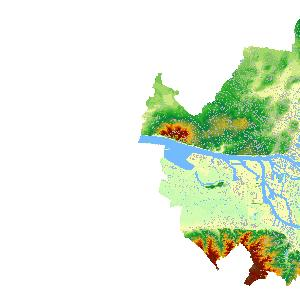

In [15]:
from IPython.display import Image

img = mytest.getmap(
    layers=['WMS_DGM1_HAMBURG'],
    size=[300, 300],
    srs="EPSG:4326",
    bbox=[9.5, 53.4, 10, 53.7],
    format="image/jpeg")

Image(img.read())

## 6. Using ipyleaflet to show the web services

ipyleaflet is a Jupyter / Leaflet bridge enabling interactive maps in the Jupyter notebook.

In [16]:
from ipyleaflet import Map, Marker

# Add a center point to your map using latitude, longitude values
my_center = (53.5452, 9.9777)

# Add a map object by specifying a zoom level and using the center point
my_map = Map(center=my_center, zoom=10)

# Define a marker object using the defined center point
my_marker = Marker(location=my_center)

# Add the marker object to the map
my_map.add(my_marker);

display(my_map)

Map(center=[53.5452, 9.9777], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### 6.1. Add a WMS layer into the leaflet map

In [17]:
from ipyleaflet import Map, Marker, WMSLayer, basemaps


# Add one of the WMS service that you found in the sections above.
my_wms = WMSLayer(
    url=mytest.url,
    layers='WMS_DGM1_HAMBURG', # Check mytest.contents
    format='image/png', #Check mytest.getOperationByName('GetMap').formatOptions
    transparent=True, # Check the value for mytest['WMS_DGM1_HAMBURG'].opaque
)

my_center = (53.5452, 9.9777)

# Change the following assignment to add a simple basemap for a better visualization
my_map = Map(basemap=basemaps.CartoDB.Positron, center=my_center, zoom=10)

my_marker = Marker(location=my_center)

# Add the WMS service into the map
my_map.add(my_wms)
my_map.add(my_marker);

# display(my_map)
my_map

Map(center=[53.5452, 9.9777], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

### 6.2. Add a GeoJSON data into the leaflet map using a OGC API - Features connection

In [18]:
from ipyleaflet import Map, Marker, basemaps, GeoJSON

# Add "OGC API - Features" class of the OWSLib
# Alternative Solution: Use requests library to get data directly.
from owslib.ogcapi.features import Features

# Add json library to convert dictionaries to json
import json

my_api = Features('https://api.hamburg.de/datasets/v1/solarpotenzialanalyse/')

# Check following methods or attributes supported by OWSLib:
# my_api.collections, my_api.collection_queryables, my_api.collection_items
my_items = my_api.collection_items('gebaeude', bbox=[9.9767,53.5442,9.9787,53.5462], limit=100 )

my_json = json.dumps(my_items)

# Write the request as a json file, preferably with ".geojson" file extension.
with open('responses/exr3/my_api.geojson', 'w') as f:
    f.write(my_json)

# Check the file and read as geojson to laod into map
with open('responses/exr3/my_api.geojson', 'r') as f:
    my_data = json.load(f)

# Specify some styles to the geojson data:
my_geojson = GeoJSON(
    data=my_data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.1, 'weight': 1, 'color': 'red'
    }
)

my_center = (53.5452, 9.9777)

# Increase the zoom level to not overload the "Features" request
my_map = Map(basemap=basemaps.CartoDB.Positron, center=my_center, zoom=15)

my_marker = Marker(location=my_center)

# Add the geojson file into the map
my_map.add(my_geojson);

my_map.add(my_marker);


# display(my_map)
my_map

Map(center=[53.5452, 9.9777], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…